In [168]:
import pandas as pd
import pandas_datareader.data as web
from pandas import Series, DataFrame
import datetime
from datetime import date, timedelta

import matplotlib as mpl

In [169]:
StartingAmount = 500_000

import libaries

In [170]:
stock = "GOOGL"
daysHistory = 500
start = (date.today()-timedelta(daysHistory))

end = date.today()

df = web.DataReader(stock,'yahoo',start,end)

df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-09-21,1440.060059,1402.680054,1431.619995,1430.140015,2845400,1430.140015
2020-09-22,1463.969971,1429.500000,1450.319946,1459.819946,1697500,1459.819946
2020-09-23,1453.079956,1402.680054,1452.089966,1409.390015,1886300,1409.390015
2020-09-24,1437.989990,1402.150024,1402.680054,1422.859985,1727600,1422.859985
2020-09-25,1445.939941,1407.680054,1425.050049,1439.060059,1516300,1439.060059
...,...,...,...,...,...,...
2022-01-27,2653.050049,2578.649902,2626.080078,2580.100098,1597500,2580.100098
2022-01-28,2667.129883,2569.699951,2593.179932,2667.020020,1718100,2667.020020
2022-01-31,2709.459961,2644.189941,2683.239990,2706.070068,1999300,2706.070068


In [171]:
df['Price_Moving_Avg'] = df['Adj Close'].rolling(window=30).mean()

df['Vol_Moving_Avg'] = df['Volume'].rolling(window=30).mean()

df['Price_Moving_std'] = df['Adj Close'].rolling(window=30).std() * std

In [172]:
df = df[df['Price_Moving_Avg'].notna()]
df = df[df['Price_Moving_std'].notna()]

df

,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg,Price_Moving_std
Date,,,,,,,,,
2020-10-30,1681.319946,1601.569946,1667.439941,1616.109985,4993900,1616.109985,1515.793660,1.919843e+06,6.481515
2020-11-02,1658.239990,1614.239990,1623.540039,1624.319946,2211400,1624.319946,1522.266325,1.898710e+06,6.565681
2020-11-03,1659.000000,1612.109985,1630.760010,1645.660034,1571600,1645.660034,1528.460994,1.894513e+06,6.827654
2020-11-04,1770.030029,1703.000000,1705.579956,1745.849976,3567100,1745.849976,1539.676326,1.950540e+06,7.531439
2020-11-05,1791.819946,1741.030029,1770.449951,1762.500000,1987900,1762.500000,1550.997660,1.959217e+06,8.234801
...,...,...,...,...,...,...,...,...,...
2022-01-27,2653.050049,2578.649902,2626.080078,2580.100098,1597500,2580.100098,2795.938338,1.679517e+06,12.425182
2022-01-28,2667.129883,2569.699951,2593.179932,2667.020020,1718100,2667.020020,2787.211670,1.676170e+06,12.378996
2022-01-31,2709.459961,2644.189941,2683.239990,2706.070068,1999300,2706.070068,2781.117342,1.686730e+06,12.310970


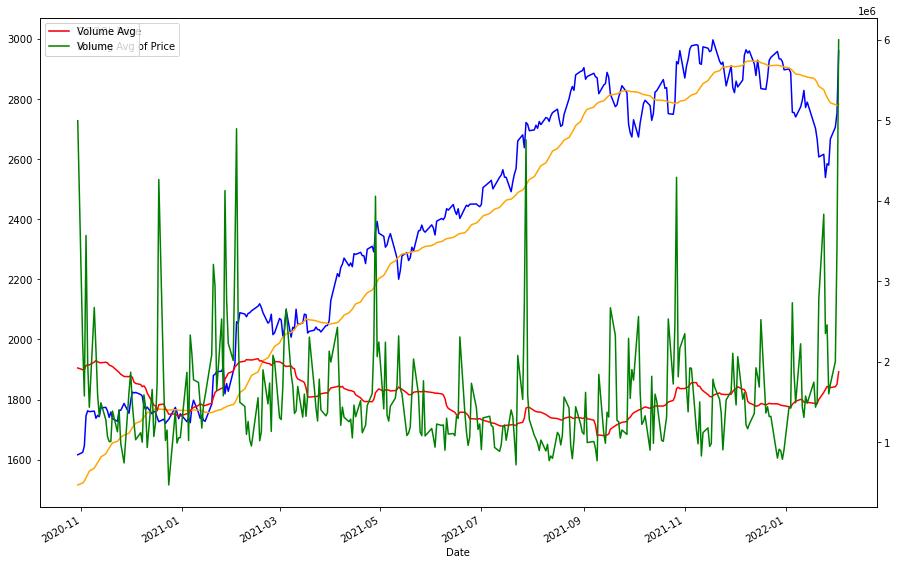

In [173]:
close_price = df["Adj Close"]
mavgplot = df["Price_Moving_Avg"]
vmagplot = df["Vol_Moving_Avg"]
volumePlot = df['Volume']
mpl.rc('figure',figsize=(15,10))
#mpl.style.use('ggplot')

close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
vmagplot.plot(secondary_y=True,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=True,legend =False,color = 'green')
mpl.pyplot.legend()
mpl.pyplot.show()
#AddPriceMoving Avg

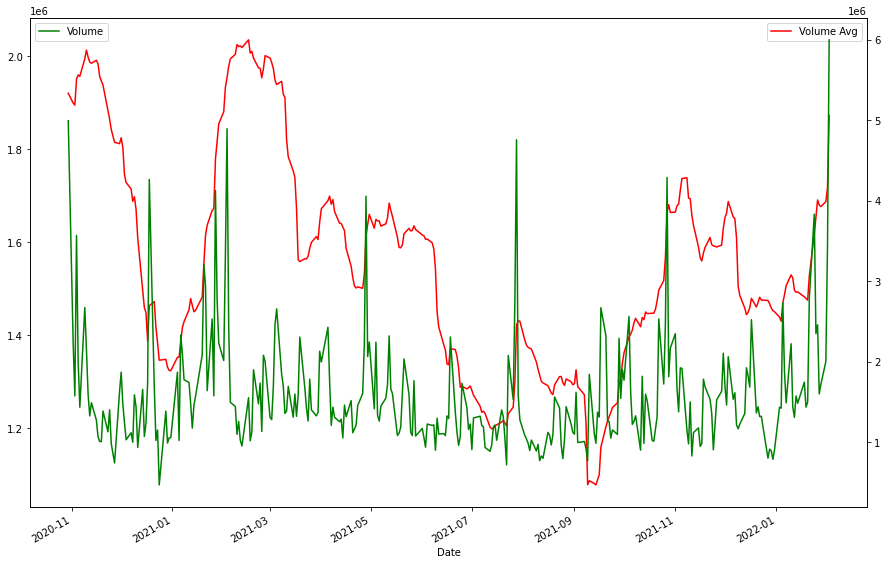

In [174]:
vmagplot.plot(secondary_y=False,label='Volume Avg',legend = True,color='red')
volumePlot.plot(label ='Volume',secondary_y=True,legend =False,color = 'green')
mpl.pyplot.legend()
mpl.pyplot.show()

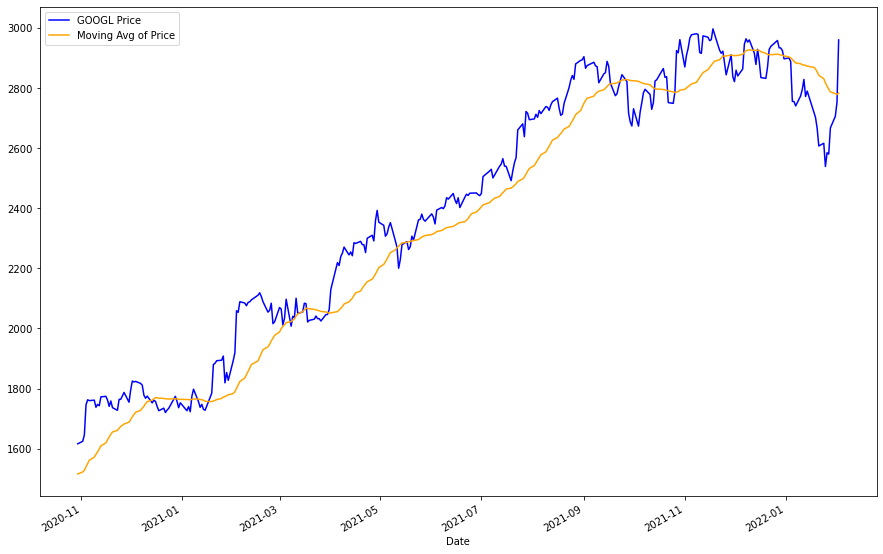

In [175]:
close_price.plot(label=(stock+" Price"),legend=True,color='blue')
mavgplot.plot(label = 'Moving Avg of Price',legend=True,color='orange')
mpl.pyplot.legend()
mpl.pyplot.show()

In [176]:
df['Price Lower than MAVG'] = df['Price_Moving_Avg'].gt(df['Adj Close'])
# adj close . lt - Price moving

df['Volume Higher than MAVG'] = df['Vol_Moving_Avg'].gt(df['Volume'])

df

,High,Low,Open,Close,Volume,Adj Close,Price_Moving_Avg,Vol_Moving_Avg,Price_Moving_std,Price Lower than MAVG,Volume Higher than MAVG
Date,,,,,,,,,,,
2020-10-30,1681.319946,1601.569946,1667.439941,1616.109985,4993900,1616.109985,1515.793660,1.919843e+06,6.481515,False,False
2020-11-02,1658.239990,1614.239990,1623.540039,1624.319946,2211400,1624.319946,1522.266325,1.898710e+06,6.565681,False,False
2020-11-03,1659.000000,1612.109985,1630.760010,1645.660034,1571600,1645.660034,1528.460994,1.894513e+06,6.827654,False,True
2020-11-04,1770.030029,1703.000000,1705.579956,1745.849976,3567100,1745.849976,1539.676326,1.950540e+06,7.531439,False,False
2020-11-05,1791.819946,1741.030029,1770.449951,1762.500000,1987900,1762.500000,1550.997660,1.959217e+06,8.234801,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-27,2653.050049,2578.649902,2626.080078,2580.100098,1597500,2580.100098,2795.938338,1.679517e+06,12.425182,True,True
2022-01-28,2667.129883,2569.699951,2593.179932,2667.020020,1718100,2667.020020,2787.211670,1.676170e+06,12.378996,True,False
2022-01-31,2709.459961,2644.189941,2683.239990,2706.070068,1999300,2706.070068,2781.117342,1.686730e+06,12.310970,True,False


In [177]:
z=1
PL=0.00
Total_Gain =0
starting_price =1
#PG -> Per_Gain

Start_Price = (df['Adj Close'].head(1))
Start_Price = float(Start_Price)
print("Start Price:", Start_Price)

End_Price = (df['Adj Close'].tail(1))
End_Price = float(End_Price)
print("End Price:", End_Price)

Return = (PL/Start_Price)
Return_Per = "{:.2%}".format(Return)



benchRe = End_Price - Start_Price
benchREP = (benchRe/Start_Price) 
TotalPro = (benchREP) * StartingAmount
print(TotalPro)

Start Price: 1616.1099853515625
End Price: 2960.0
415779.25600035593


In [178]:
df.iloc[1-1]['Adj Close']

1616.1099853515625

In [180]:
index =0
for date_var,row in df.iterrows():
    if row['Volume Higher than MAVG']==1:
        if row['Price Lower than MAVG']==1:
            if z==1:
                print(date_var,row['Adj Close'], '- BUY')
                close_adj = row['Adj Close']
                starting_price = close_adj
                z -=1
                
    elif(row['Adj Close'] < df.iloc[index-1]['Adj Close'] - df.iloc[index-1]['Price_Moving_std']):
        if z==1:
                print(date_var,row['Adj Close'], '- BUYING BC OF TREND DROP')
                close_adj = row['Adj Close']
                starting_price = close_adj
                z -=1
    else:
        if row['Volume Higher than MAVG']==0 and row['Price Lower than MAVG']==0 :
                if z==0:
                    print(date_var,row['Adj Close'],'- SELL')
                    close_adj = row['Adj Close']
                    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                    Total_Gain += single_trade_percent_gain

                    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                    print()
                    z+=1
        else:
            if (((row['Adj Close']- starting_price)/starting_price) * 100) > 1:
                if z==0:
                    print(date_var,row['Adj Close'],'- SELL DUE TO INCREASE IN %')
                    close_adj = row['Adj Close']
                    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
                    Total_Gain += single_trade_percent_gain
                    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")
                    print()
                    z+=1
    index +=1

if(z==0):
    print(date_var,row['Adj Close'],'- SELL DUE TO LAST DAY')
    close_adj = row['Adj Close']
    single_trade_percent_gain = ((close_adj - starting_price) / starting_price) * 100
    Total_Gain += single_trade_percent_gain
    print("This trade gain/loss results: "+str(round(single_trade_percent_gain,2))+"%")

Hold_Return = (End_Price - Start_Price)
Hold_Return_Per = "{:.2%}".format((End_Price-Start_Price)/Start_Price)
TotalReturn = (Total_Gain/100) * StartingAmount
print()
print("The return for holding start to end was: "+str(Hold_Return_Per)+".")
print()
print("Return percentage from all trades: " + str(round(Total_Gain,2))+"% based on "+str(daysHistory)+" days of data")
print("With a starting amount of: $"+str(round(StartingAmount,3))+" it ended with a profit of: $"+str(round(TotalReturn,3)))
print("This algoritm has gained you: $"+str(round(StartingAmount+TotalReturn,3)))
std = 0.2


2020-10-30 00:00:00 1616.1099853515625 - BUYING BC OF TREND DROP
2020-11-02 00:00:00 1624.3199462890625 - SELL
This trade gain/loss results: 0.51%

2020-11-10 00:00:00 1737.719970703125 - BUYING BC OF TREND DROP
2020-12-01 00:00:00 1795.3599853515625 - SELL
This trade gain/loss results: 3.32%

2020-12-14 00:00:00 1752.260009765625 - BUYING BC OF TREND DROP
2020-12-28 00:00:00 1773.9599609375 - SELL
This trade gain/loss results: 1.24%

2020-12-29 00:00:00 1757.760009765625 - BUY
2021-01-07 00:00:00 1774.3399658203125 - SELL
This trade gain/loss results: 0.94%

2021-01-11 00:00:00 1756.2900390625 - BUYING BC OF TREND DROP
2021-01-19 00:00:00 1784.469970703125 - SELL
This trade gain/loss results: 1.6%

2021-01-27 00:00:00 1818.93994140625 - BUYING BC OF TREND DROP
2021-01-28 00:00:00 1853.199951171875 - SELL
This trade gain/loss results: 1.88%

2021-01-29 00:00:00 1827.3599853515625 - BUYING BC OF TREND DROP
2021-02-01 00:00:00 1893.0699462890625 - SELL
This trade gain/loss results: 3.6%
